# **Data Science**
# **Tercer entrega del proyecto final**

## **Presentacion del problema.**

Las enfermedades cardiacas (EC) representan la principal causa de mortalidad en todo el mundo (1). Las EC son un grupo de desordenes que afectan al corazon y a los vasos sanguineos. La deteccion temprana es un factor importante para el pronostico.

A partir del problema y de la exposicion a los conceptos vistos en clase, nos surgieron las siguientes preguntas:

1. Es posible generar un modelo que clasifique sujetos de alto riesgo vs de bajo riesgo de EC?
2. Disponemos de los datos para ello?
3. Que nivel de rendimiento puede alcanzar el modelo?
4. Puede resultar util en la practica? Es decir, sera lo suficientemente preciso, rapido y conveniente para que tenga utilidad clinica?

## **Objetivos**
Estas preguntas permitieron formularon el objetivo principal del presente proyecto: hacer uso de las herramientas aprendidas en el curso de DS para entrenar, validar y deployar un modelo de machine learning que clasifique pacientes de alto riesgo vs de bajo riesgo de EC con una precision mayor a un modelo aleatorio. 

**Los objetivos especificos son:**

1. Realizar un proceso apropiado de Data Acquisition: encontrar una fuente de datos apropiada.
2. Realizar un analisis exploratorio de datos y una limpieza de los mismos: explorar las dimensiones del dataset, tratamiento de datos nulos, analisis univariado, bivariado y multivariado. 
3. Describir las variables de interes
4. Identificar las variables mas correlacionadas con el target.
5. Generar insights respecto a la relevancia clinica de las distintas variables.
6. Entrenar un modelo de clasificacion con los datos.
7. Evaluar su rendimiento.
8. Evaluar su potencial utilidad en un contexto clinico real.
9. Optimizar recursos en la prevencion de las EC.

**Equipo**

El equipo de trabajo esta conformado por Felipe Aguirre, psicologo, y Francisco Mansilla, entrenador deportivo. 

## **Fuente de datos**
El proceso de busqueda del dataset se realizo en google. Los criterios de inclusion fueron: tener minimo 10 columnas y 1000 filas, y poseer una columna target binaria que implique la presentacion o no de la EC para cada observacion. Luego de comparar mas de un dataset que cumplieron los criterios de inclusion, escogimos el dataset "Heart Disease Dataset" (2). Sus datos son de 1988 y se compone de cuatro subdatasets provenientes de Cleveland, Hungria, Suiza y Long Beach V. El resto de sus caracteristicas seran exploradas y descritas a continuacion. 

**Diccionario de variables:**

•	**age**
Edad de los individuos encuestados. Variable de tipo Numerica. Dominio: de 29 a 77.

•	**sex**
Genero de los individuos encuestados. Variable de tipo Categorica. Dominio: 1 significa “Male/Masculino”; 0 significa “Female/Femenino”.

•	**cp (Chest Pain)**
Dolor pectoral causado por la “angina” (dolor pectoral causado por el bajo flujo de sangre al corazon). Variable de tipo Categorica. Dominio: 0 significa “Stable Angina”; 1 significa “Unstable Angina”, 2 significa “Variant Angina”; 3 significa “Refractory Angina”.

•	**trestbps (Resting Blood Pressure)**
Presion arterial normal, medidad en mm Hg. Variable de tipo Numerica. Dominio: de 94 a 200.

•	**chol (Serum Cholesterol)**
Nivel de Colesterol total en sangre del individuo, en mg. Variable de tipo Numerica. Dominio: de 126 a 564.

•	**fbs (Fasting Blood Sugar)**
Nivel de azúcar en sangre mayor a 120mg. Variable de tipo Categorica. Dominio: 1 significa “True”; 0 significa “False”.

•	**restecg (Resting Electrocardiographic Results)**
Resultado de Electrocardiograma en Reposo. Variable de tipo Categorica. Dominio: 1 significa “Normal”; 2 significa “Desviacion anormal”; 3 significa “Probable o definitiva Hipertrofia Ventricular Izquierda”.

•	**thalach (Maximum Heart Rate Achieved)**
Maximo ritmo cardiaco alcanzado. Variable de tipo Categorica. Dominio: de 71 a 202.

•	**exang (Exercise Induced Angina)**
Angina producida al realizar ejercicio. Variable de tipo Categorica. Dominio: 1 significa “True”; 0 significa “False”.

•	**oldpeak**
Relacion entre la demanda de oxigeno y la disminución del flujo sanguíneo, refleja la privación de oxigeno debido al ejercicio. Variable de tipo Numerica. Dominio: de 0.0 a 6.2, significando el valor mas alejado a 0.0 una privación mayor de oxigeno.

•	**slope**
Desvio del ritmo cardiaco al realizar ejercicio. Variable de tipo Categorica. Dominio: 0 significa “Upsloping”; 1 significa “Flat”; 2 significa “Downsloping”.

•	**ca**
Numero de vasos sanguineos. Tipo de variable Numerica. Dominio: de 0 a 3.

•	**thal (Thalassemia)**
Enfermedad hereditarian en la que la sangre tiene un numero menor de globulos rojos a los normales. Variable de tipo Categorica. Dominio: 3 significa “Normal”; 6 significa “Fixed Defect”; 7 significa “Reversable defect”.

•	**target**
Infarto registrado. Variable de tipo Categorica. Dominio: 1 significa “True”; 0 significa “False”.



## **CITAS:**

1) https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

2) https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

3) https://en.wikipedia.org/wiki/ST_depression

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from seaborn import boxplot
from seaborn import distplot

In [ ]:
# Lectura del dataset
df = pd.read_csv('heart.csv')

Empecemos viendo el shape de nuestro df

In [ ]:
df.shape

(1025, 14)

El pasaje de los datos a un dataframe de pandas se realizo correctamente.

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Vemos los tipos de datos. Son todas variables numericas.

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

El dataset no contiene nulos. 

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Observamos que existen 723 filas duplicadas. Elegimos no eliminarlos dado que representan mas de la mitad de los datos, y el dataset final seria muy pequeño. De tratarse de un proyecto real, eliminariamos los duplicados de todos modos. 

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

# **Analisis Univariado**

##Principales Estadisticos
El target no parece estar desbalanceado.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


Observamos la correlacion de las variables con el target.

In [ ]:
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

La distribucion de la edad de la muestra parece concentrarse entre los 50 y 60 años. Casi todos son mayores de 30 años, y menores de 80.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


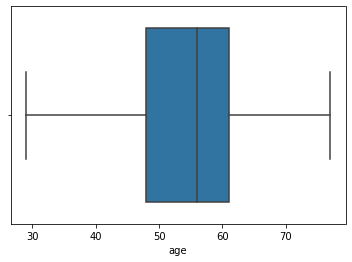

In [ ]:
boxplot(df.age, orient="v")

El grafico de barras evidencia una distribucion aproxidamente normal de la variable edad. Tambien puede observarse una dispercion bastante marcada de los datos, lo cual se corresponde con el desvio estandar elevado encontrado anteriormente en la tabla del metodo describe. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


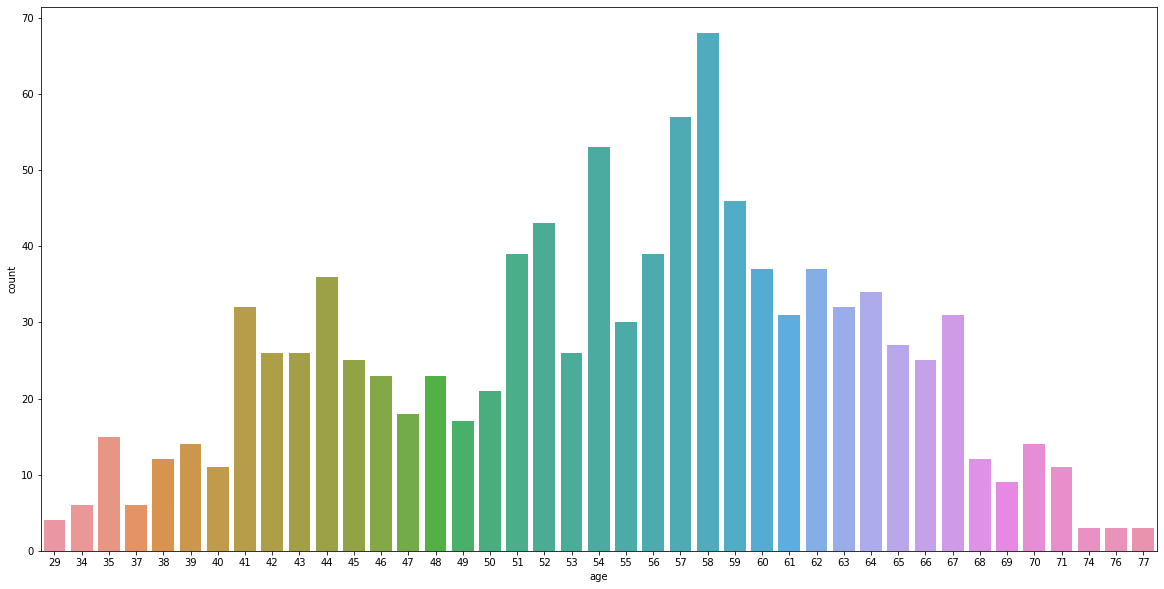

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(df['age'])
plt.show()

La varible talach, la cual se correlaciona modestamente con el target, presenta una distribucion que se asemeja a una normal.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


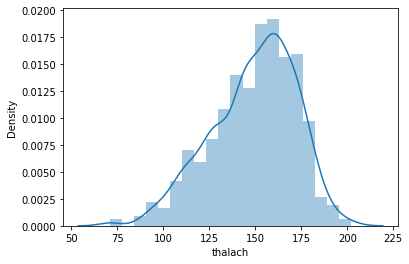

In [ ]:
distplot(df.thalach)

La distribucion de sexo parece estar desblanaceada. Esto puede ser un problema, dado que el grupo de mujeres esta poco representado por este dataset. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


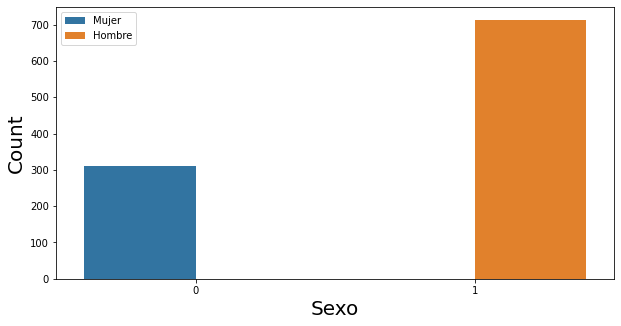

In [ ]:
plt.figure(figsize=(10,5))
p = sns.countplot(df['sex'], hue=df['sex'])
p.set_xlabel("Sexo", fontsize = 20)
p.set_ylabel("Count", fontsize = 20)
p.legend(['Mujer','Hombre'])

# **Analisis Bivariado**

A partir del mapa de calor, vemos que las principales correlaciones positivas con el target son:
- cp (dolor de pecho)
- thalac (maximo ritmo cardiaco alcanzado)
- slope (variable del electrocardiograma)

Por otro lado, las principales correlaciones negativas son:
- oldpeak (anomalia en el electrocardiograma inducida por ejercicio)
- exang (angina inducida por ejercicio)
- ca ()

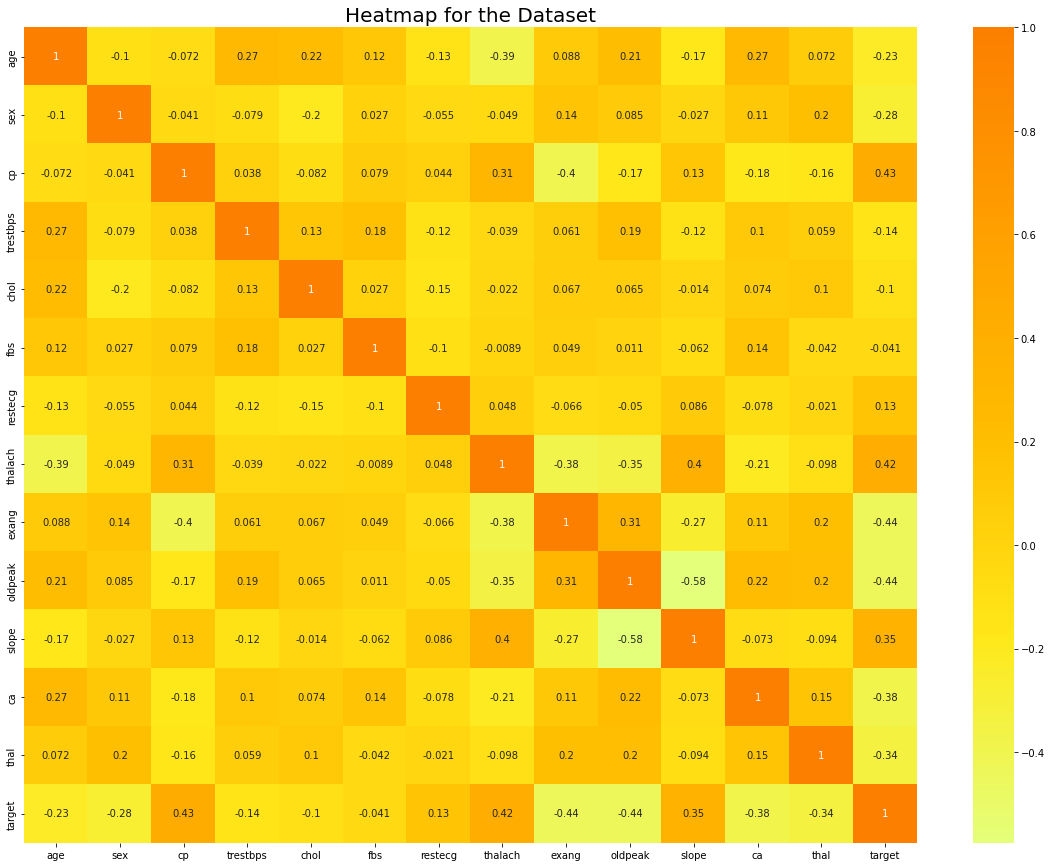

In [ ]:
#Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

Al ser mujer, hay mas chances de tener una EC que de no tenerla.
En el caso de los hombres ocurre lo contrario.

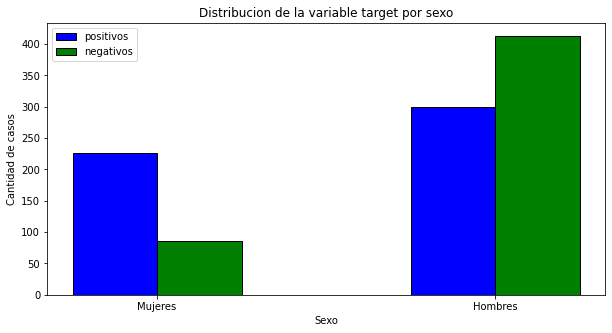

In [ ]:
plt.figure(figsize=(10,5))

df_women = df[df['sex']==0][['target']]
df_man = df[df['sex']==1][['target']]

positivos = [df_women.sum()[0], df_man.sum()[0]]
negativos = [len(df_women)-df_women.sum()[0], len(df_man)-df_man.sum()[0]]
  
n=2
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, positivos, color = 'b',
        width = width, edgecolor = 'black',
        label='positivos')
plt.bar(r + width, negativos, color = 'g',
        width = width, edgecolor = 'black',
        label='negativos')
  
plt.xlabel("Sexo")
plt.ylabel("Cantidad de casos")
plt.title("Distribucion de la variable target por sexo")

plt.xticks(r + width/2,['Mujeres','Hombres'])
plt.legend()
  
plt.show()

Puede observarse que el tipo de cp es una variable importante. Los tipo 1 y tipo 2, poseen una cantidad desproporcionada de casos positivos del target.

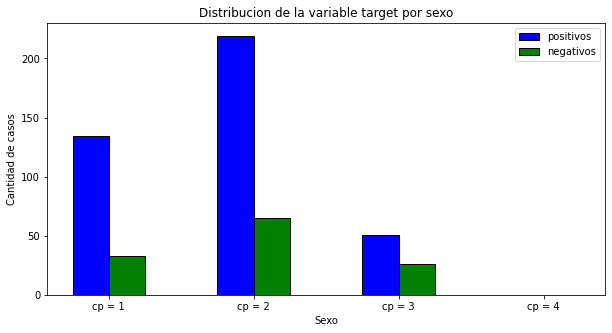

In [ ]:
plt.figure(figsize=(10,5))

df_1 = df[df['cp']==1][['target']]
df_2 = df[df['cp']==2][['target']]
df_3 = df[df['cp']==3][['target']]
df_4 = df[df['cp']==4][['target']]

positivos = [df_1.sum()[0], df_2.sum()[0], df_3.sum()[0], df_4.sum()[0],]
negativos = [len(df_1)-df_1.sum()[0], len(df_2)-df_2.sum()[0], len(df_3)-df_3.sum()[0], len(df_4)-df_4.sum()[0]]
  
n=4
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, positivos, color = 'b',
        width = width, edgecolor = 'black',
        label='positivos')
plt.bar(r + width, negativos, color = 'g',
        width = width, edgecolor = 'black',
        label='negativos')
  
plt.xlabel("Sexo")
plt.ylabel("Cantidad de casos")
plt.title("Distribucion de la variable target por sexo")

plt.xticks(r + width/2,['cp = 1','cp = 2', 'cp = 3', 'cp = 4'])
plt.legend()
  
plt.show()

# **Analisis Multivariado**

Primero comparamos las dos variables mas fuertemente correlacionadas con el target. Puede observarse que el grupo de mayor riesgo se ubica en valores altos de dolor de pecho (cp) y bajos de old peak. Old peak refiere a una anomalia observada en el electrocardiograma inducida por ejercicio (3).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 504x144 with 0 Axes>

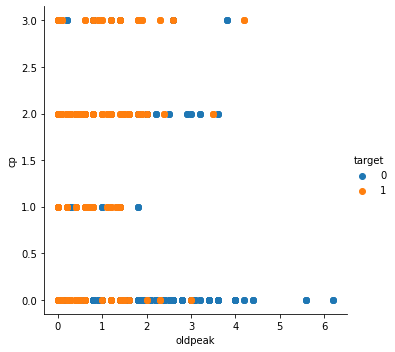

In [ ]:
#FacetGrid - oldpeak vs cp
plt.figure(figsize=(7,2))
sns.FacetGrid(df,hue = 'target' , size = 5).map(plt.scatter,'oldpeak','cp').add_legend();
plt.show()

Aqui podemos oberservar una clusterizacion de los datos en funcion de la edad y de thalach (maximo ritmo cardiaco alcanzado), en donde el target se ubica en valores altos de talach y, en menor medida, valores bajos de edad. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


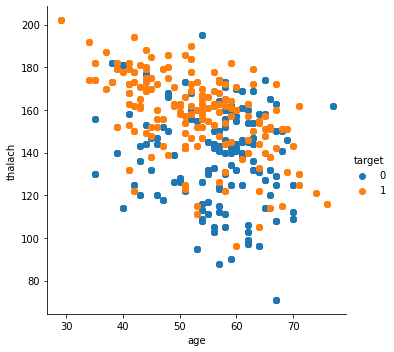

In [ ]:
#FacetGrid - age vs thalach
sns.FacetGrid(df,hue = 'target' , size = 5).map(plt.scatter,'age','thalach').add_legend();
plt.show()

**Pairplot de todo el dataset. Pueden extrarse las siguientes conclusiones:**

1. En concordancia con lo que venimos observando, la distribucion de edad tiene una media mas joven para el grupo que sufrio un infarto. Esto nos resulta contraintuitivo. 

2. Respecto a la relacion con la edad y el sexo, las mujeres de edades extremas (bajas o altas) parecen estar en mayor riesgo.

3. Respecto a la relacion entre old peak y chest pain, puede observarse en el grafico que el grupo que sufrio un infarto se agrupa en valores altos de ambas variables.

<Figure size 2400x1800 with 0 Axes>

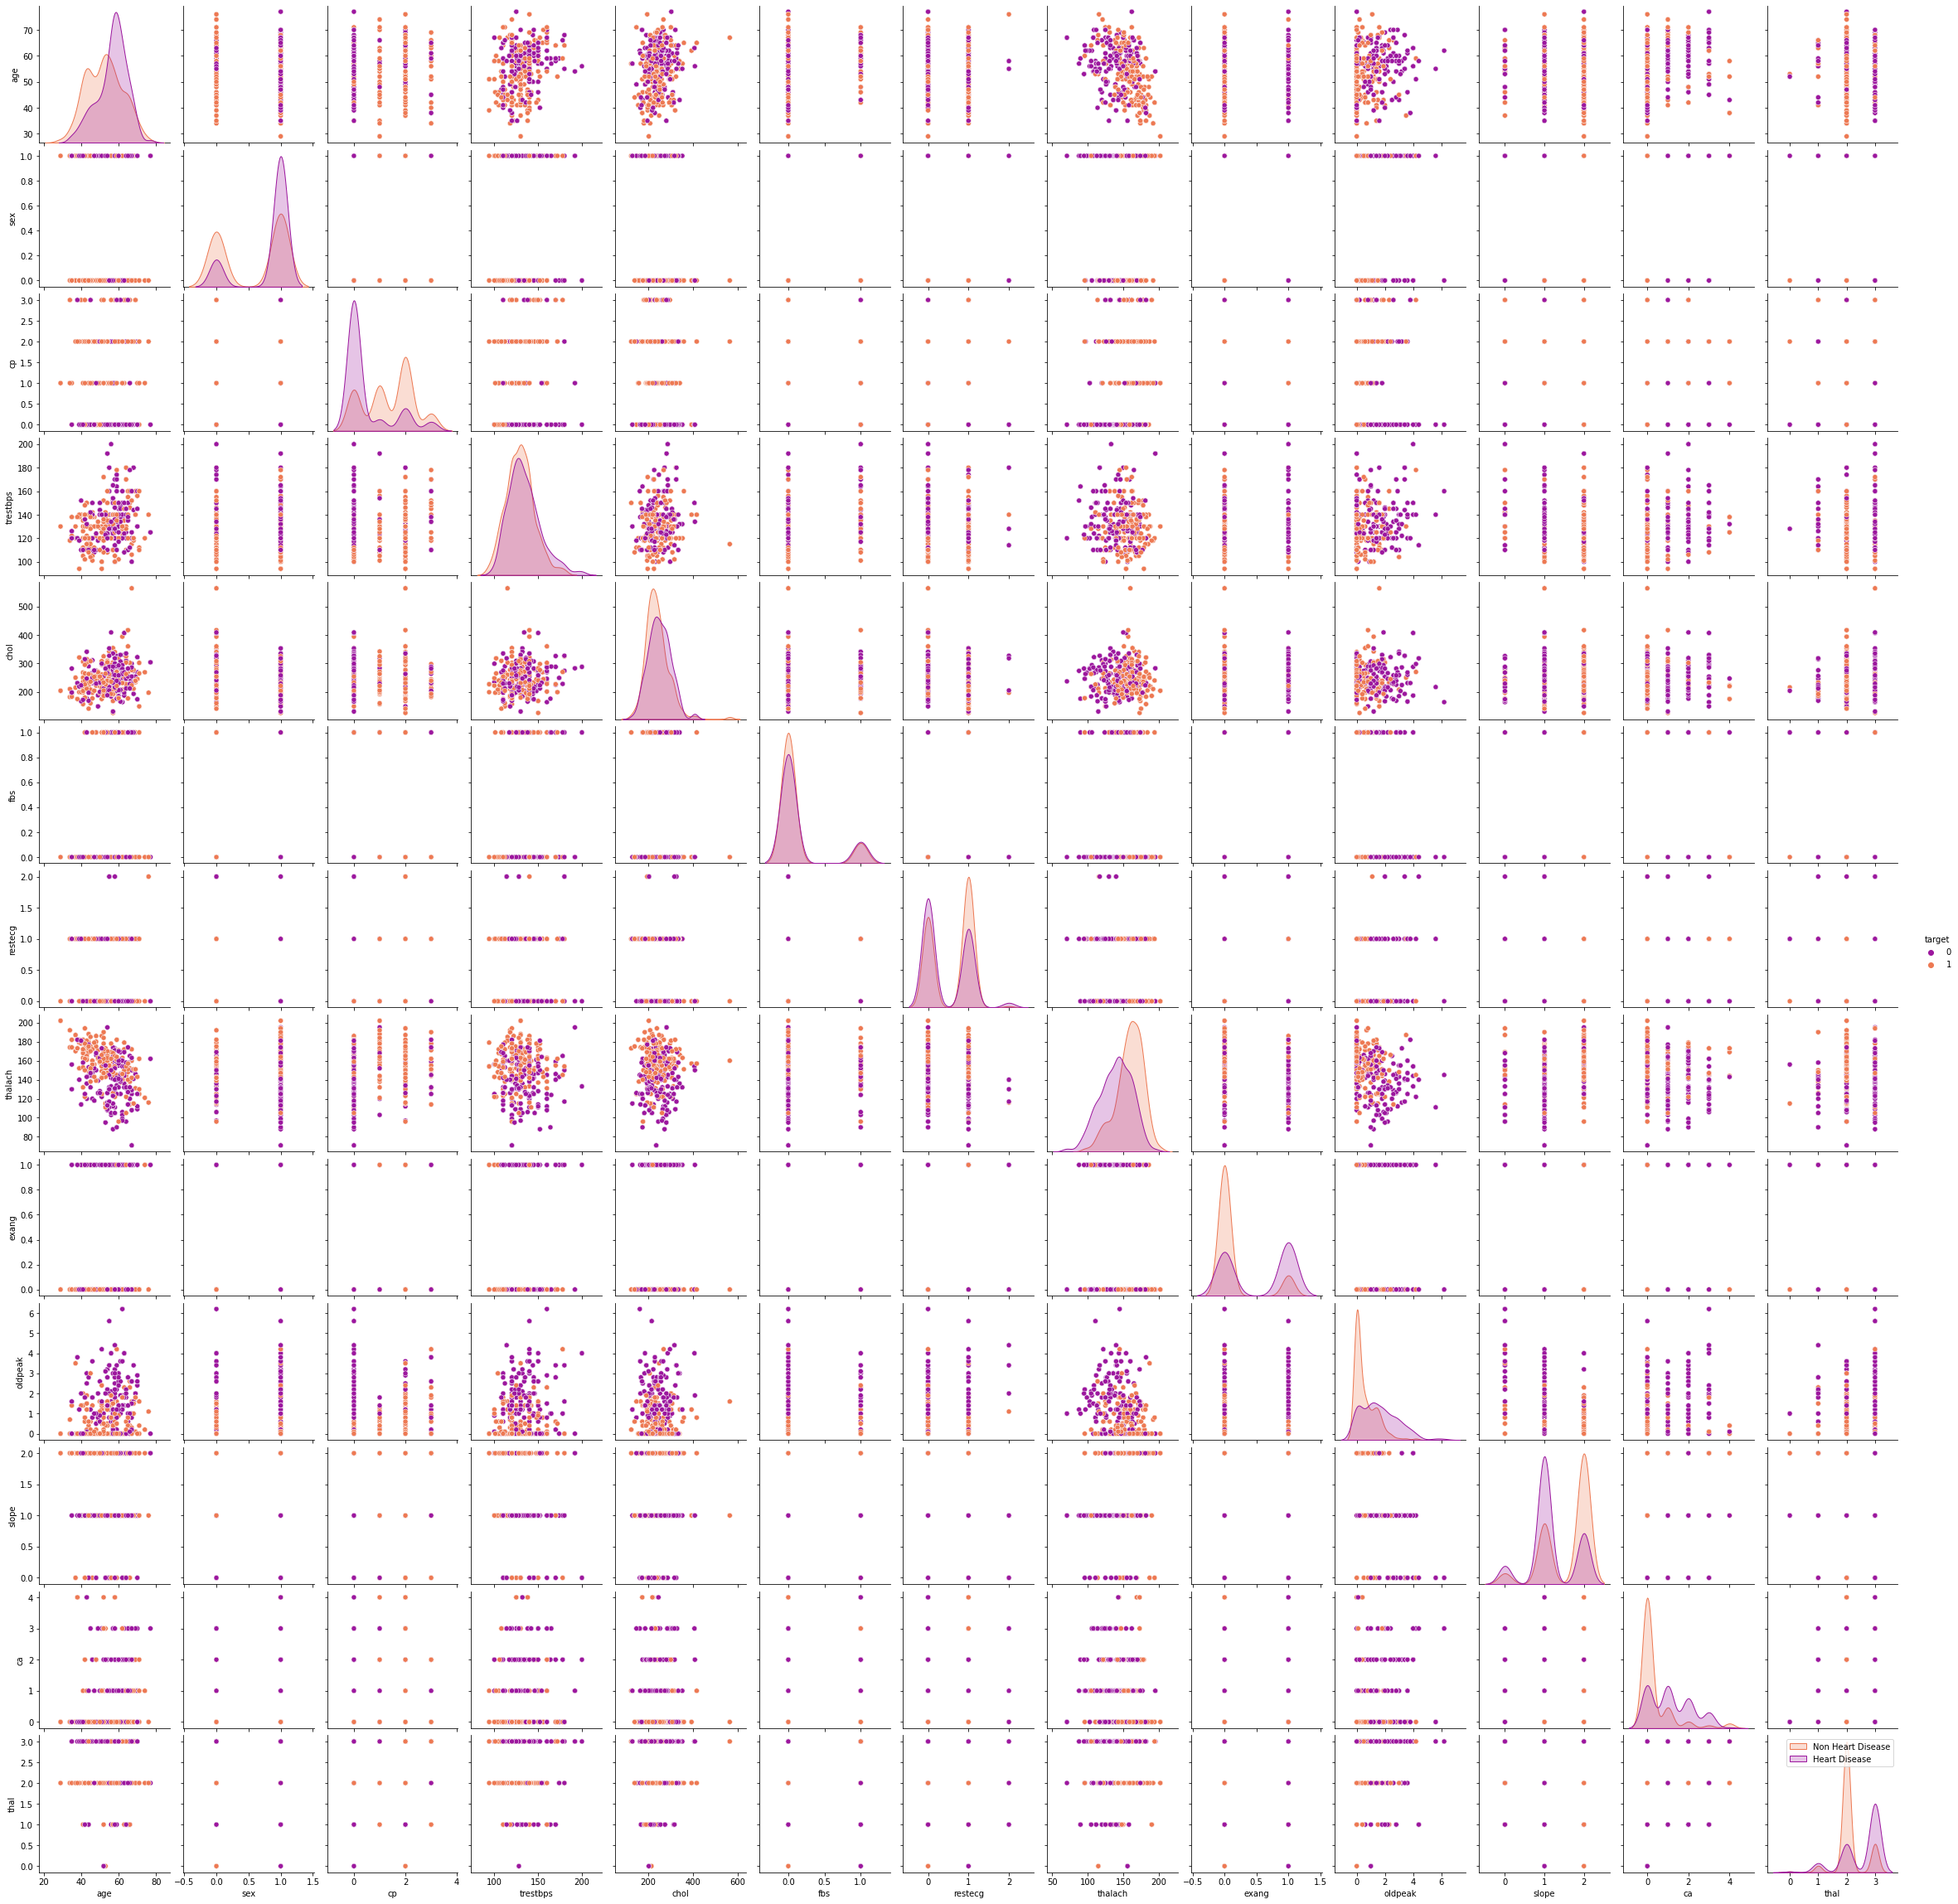

In [ ]:
plt.figure(dpi = 120)
sns.pairplot(df,hue = 'target', palette = 'plasma')
plt.legend(['Non Heart Disease','Heart Disease'])
plt.show()

# **Principal Component Analisis**


Al graficar el analisis de componente principales (con componentes = 2), observamos que los grupos se superponen considerablemente.

In [ ]:
from sklearn.decomposition import PCA

x = df.drop('target', axis=1)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

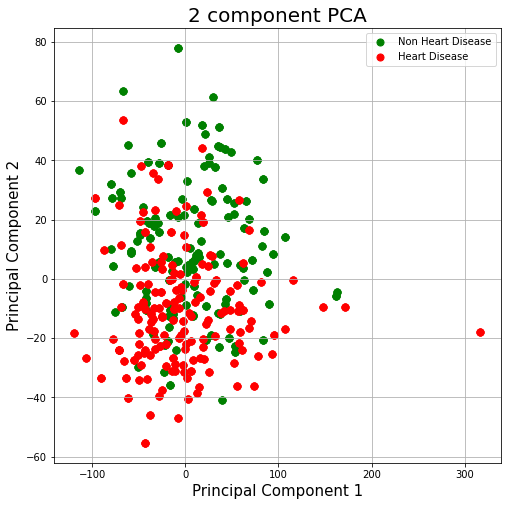

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Non Heart Disease', 'Heart Disease'])
ax.grid()

Al reducir las 14 variables en dos variables, se conserva casi el 90% de la varianza. Por lo tanto, el PCA explica exitosamente el dataset, y es suficientemente explicativo en caso de que necesitemos realizar una reduccion de dimensiones.

In [ ]:
pca.explained_variance_ratio_.sum()

0.8973010563584394

# **Filtros y transformaciones**

Al agrupar los datos por sexo y transformar las variables a su media, observamos que no hay grandes diferencias en el promedio de las variables entre grupos.

In [ ]:
df_sexo = df.groupby('sex').mean().T
df_sexo.columns = ['Mujer', 'Hombre']
df_sexo

,Mujer,Hombre
age,55.849359,53.814867
cp,1.006410,0.914446
trestbps,133.701923,130.697055
chol,261.455128,239.237027
fbs,0.134615,0.155680
restecg,0.573718,0.510519
thalach,150.830128,148.363254
exang,0.237179,0.380084
oldpeak,0.921154,1.137307
slope,1.410256,1.374474


Al agrupar el dataset por la variable target y promediar el resto de las variables, observamos que el grupo que sufrio un infarto presenta:
- menor edad promedio
- mas proporcion de mujeres
- restecg (resultado del electrocardiograma en reposo) mas elevado
- thalach mas elevado
- exang mucho mas bajo
- oldpeak mucho mas bajo
- ca mas bajo

In [ ]:
df_target = df.groupby('target').mean().T
df_target.columns = ['Non Heart Disease','Heart Disease']
df_target

,Non Heart Disease,Heart Disease
age,56.569138,52.408745
sex,0.827655,0.570342
cp,0.482966,1.378327
trestbps,134.106212,129.245247
chol,251.292585,240.979087
fbs,0.164329,0.134981
restecg,0.456914,0.598859
thalach,139.130261,158.585551
exang,0.549098,0.134981
oldpeak,1.600200,0.569962


Consideramos que esta version del dataset es la final, y puede utilizarse para entrenar el modelo.

# **Algoritmo Predictivo**

## Comparación inicial de distintos modelos

In [ ]:
# Importacion de librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Evaluacion 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
#Separamos en X e y

X = df.drop("target", axis=1) 
Y = df.target

In [ ]:
#Separamos en conjunto de Training y Testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=25) 

# **Random Forest Classifier**

In [ ]:
#Creamos el modelo

RF = RandomForestClassifier(random_state= 25, n_estimators= 200, class_weight= "balanced", max_features= "log2")

In [ ]:
#Entrenamos el modelo

RF.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=25)

In [ ]:
#Calculo el accuracy en Test y en Train

prediccionTrain_RF = RF.predict(X_train)
train_accuracy = accuracy_score(Y_train, prediccionTrain_RF)

prediccionTest_RF = RF.predict(X_test)
test_accuracy = accuracy_score(Y_test, prediccionTest_RF)

print('% de aciertos sobre el set de entrenamiento:',train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

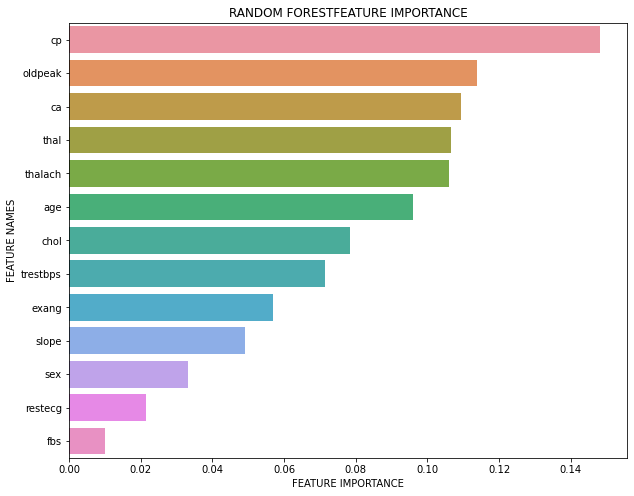

In [ ]:
plot_feature_importance(RF.feature_importances_, X_train.columns,'RANDOM FOREST')

El Test Accuracy arrojo un resultado del 100%, lo que puede suponer que el modelo de Random Forest clasificara correctamente a todos los individuos.

In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, prediccionTest_RF)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, prediccionTest_RF)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, prediccionTest_RF)
print('F1 score: %f' % f1)

# Puntaje AUC
auc = roc_auc_score(Y_test, prediccionTest_RF)
print('AUC score: %f' % auc)

Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000
AUC score: 1.000000


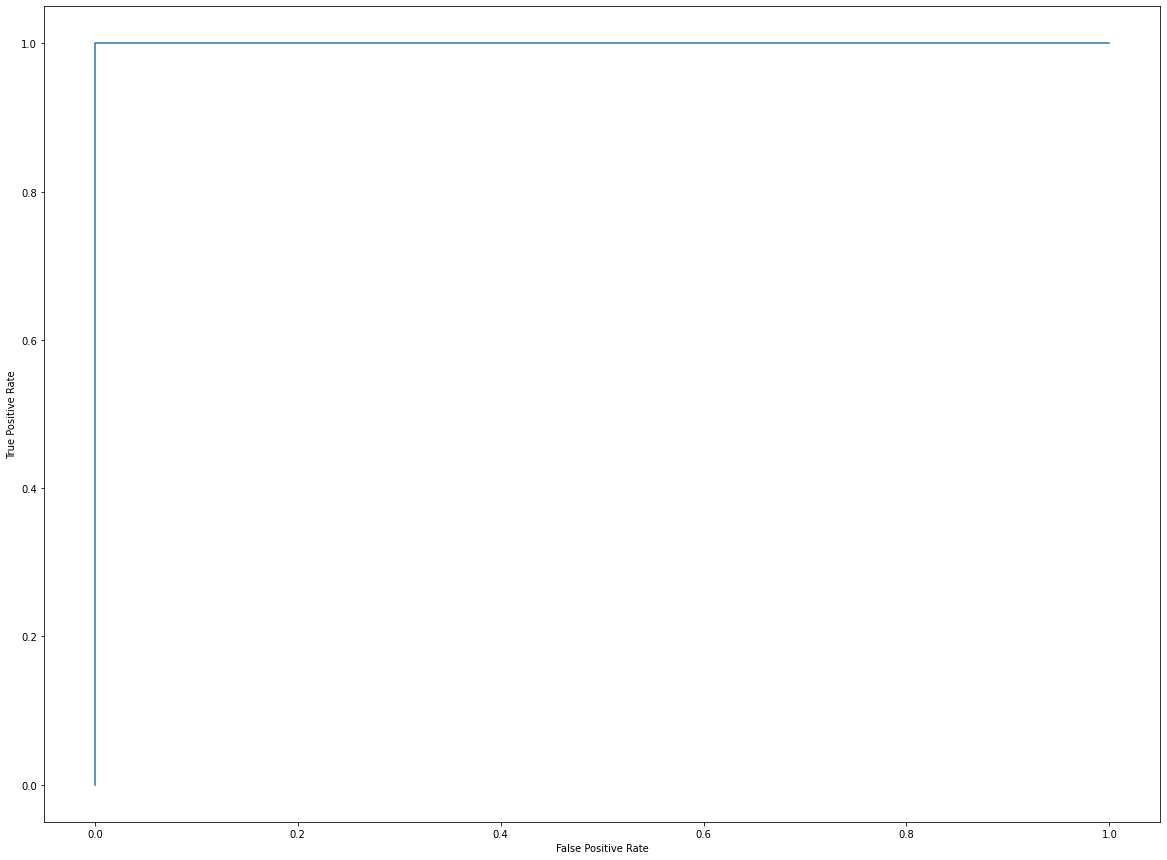

In [ ]:
y_pred_proba = RF.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Las metricas perfectas son sospechosas, por lo que volveremos a evaluarlo con un Kfold = 5

In [ ]:
scores = cross_val_score(RF, X_train, Y_train, cv=5)
scores.mean()

0.9763111888111888

## **KNN**

In [ ]:
#Creamos el modelo

KNN = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Entrenamos el modelo con los conjuntos X e Y previamente definidos

KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Calculo el accuracy en Test y en Train

prediccionTrain_KNN = KNN.predict(X_train)
train_accuracy = accuracy_score(Y_train, prediccionTrain_KNN)

prediccionTest_KNN = KNN.predict(X_test)
test_accuracy = accuracy_score(Y_test, prediccionTest_KNN)

print('% de aciertos sobre el set de entrenamiento:',train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9804741980474198
% de aciertos sobre el set de evaluación: 0.8701298701298701


El Test Accuracy arrojo un resultado del 98%, lo que supone que el modelo de KNN clasificara correcatamente a los individuos un 98% de las veces

In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, prediccionTest_KNN)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, prediccionTest_KNN)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, prediccionTest_KNN)
print('F1 score: %f' % f1)

# Puntaje AUC
auc = roc_auc_score(Y_test, prediccionTest_KNN)
print('AUC score: %f' % auc)

Precision: 0.869281
Recall: 0.869281
F1 score: 0.869281
AUC score: 0.870124


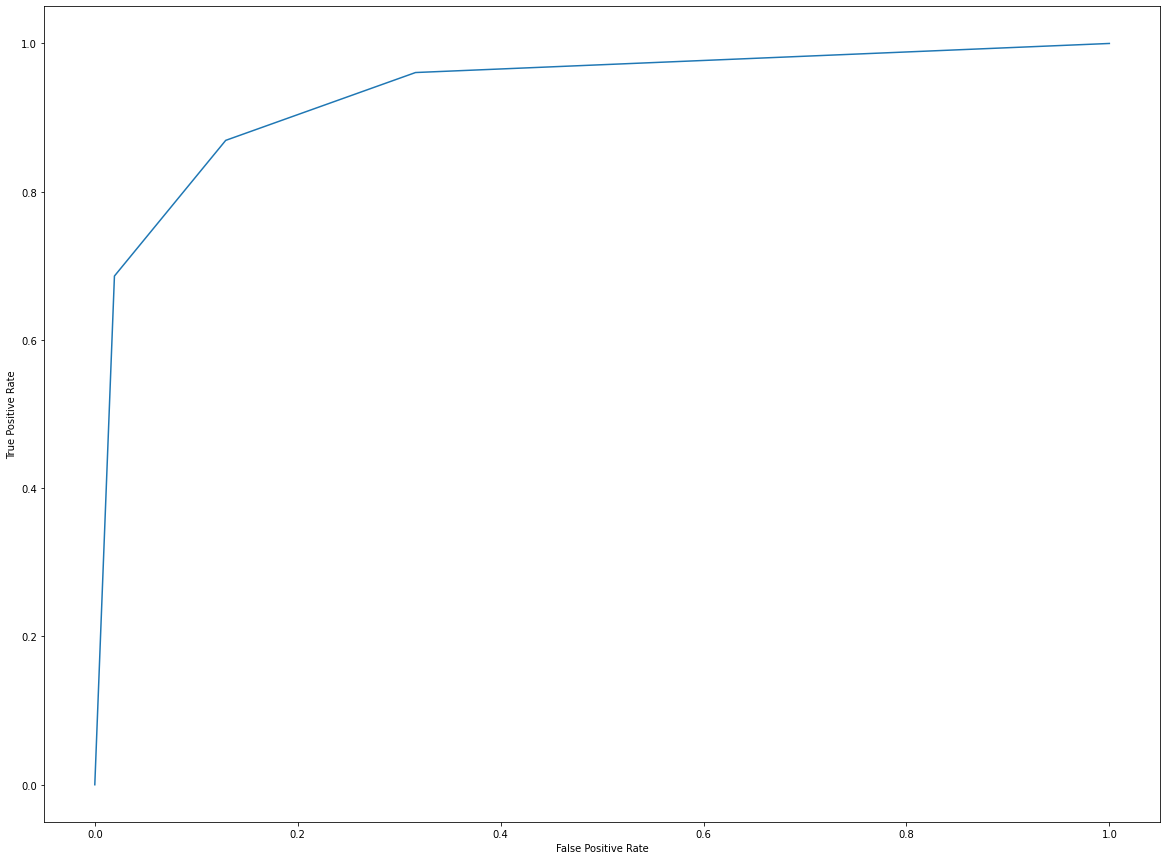

In [ ]:
y_pred_proba = KNN.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Regresion Logistica**

In [ ]:
#Creamos la Regresion Logistica

RL = LogisticRegression()

In [ ]:
#Entrenamos el modelo con los conjuntos X e Y previamente definidos

RL.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#Calculo el accuracy en Test y en Train

prediccionTrain_RL = RL.predict(X_train)
train_accuracy = accuracy_score(Y_train, prediccionTrain_RL)

prediccionTest_RL = RL.predict(X_test)
test_accuracy = accuracy_score(Y_test, prediccionTest_RL)


print('% de aciertos sobre el set de entrenamiento:',train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8479776847977685
% de aciertos sobre el set de evaluación: 0.8506493506493507


El Test Accuracy arrojo un resultado del 85%, lo que supone que el modelo de Regresion Logistica clasificara correcatamente a los individuos un 85% de las veces

In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, prediccionTest_RL)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, prediccionTest_RL)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, prediccionTest_RL)
print('F1 score: %f' % f1)

# Puntaje AUC
auc = roc_auc_score(Y_test, prediccionTest_RL)
print('AUC score: %f' % auc)

Precision: 0.820359
Recall: 0.895425
F1 score: 0.856250
AUC score: 0.850938


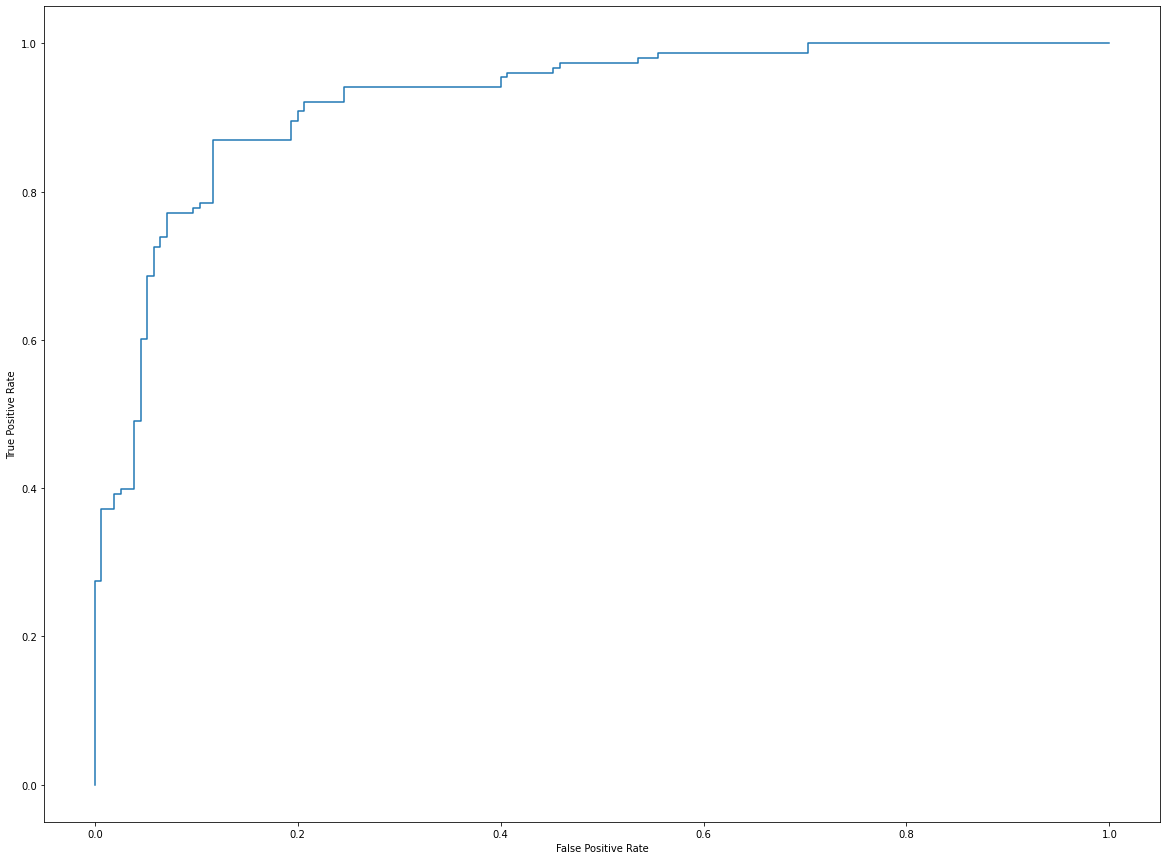

In [ ]:
y_pred_proba = RL.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Modelos de boosting**

## **Xgboost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import scipy as sp

In [ ]:
clf_xgb = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic')

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
# Grilla para Random Search
model = RandomizedSearchCV(clf_xgb, param_distributions=params, n_iter=100, cv=5)

In [ ]:
model.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(learning_rate=0.02,
                                           n_estimators=600),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]})

In [ ]:
model.best_params_

{'subsample': 0.8,
 'min_child_weight': 1,
 'max_depth': 5,
 'gamma': 0.5,
 'colsample_bytree': 1.0}

In [ ]:
model.best_estimator_

XGBClassifier(colsample_bytree=1.0, gamma=0.5, learning_rate=0.02, max_depth=5,
              n_estimators=600, subsample=0.8)

In [ ]:
y_test_pred_xgb = model.predict(X_test) #Prediccion en Test

In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_test_pred_xgb)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_test_pred_xgb)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_test_pred_xgb)
print('F1 score: %f' % f1)

# Puntaje AUC
auc = roc_auc_score(Y_test, y_test_pred_xgb)
print('AUC score: %f' % auc)

Precision: 1.000000
Recall: 0.986928
F1 score: 0.993421
AUC score: 0.993464


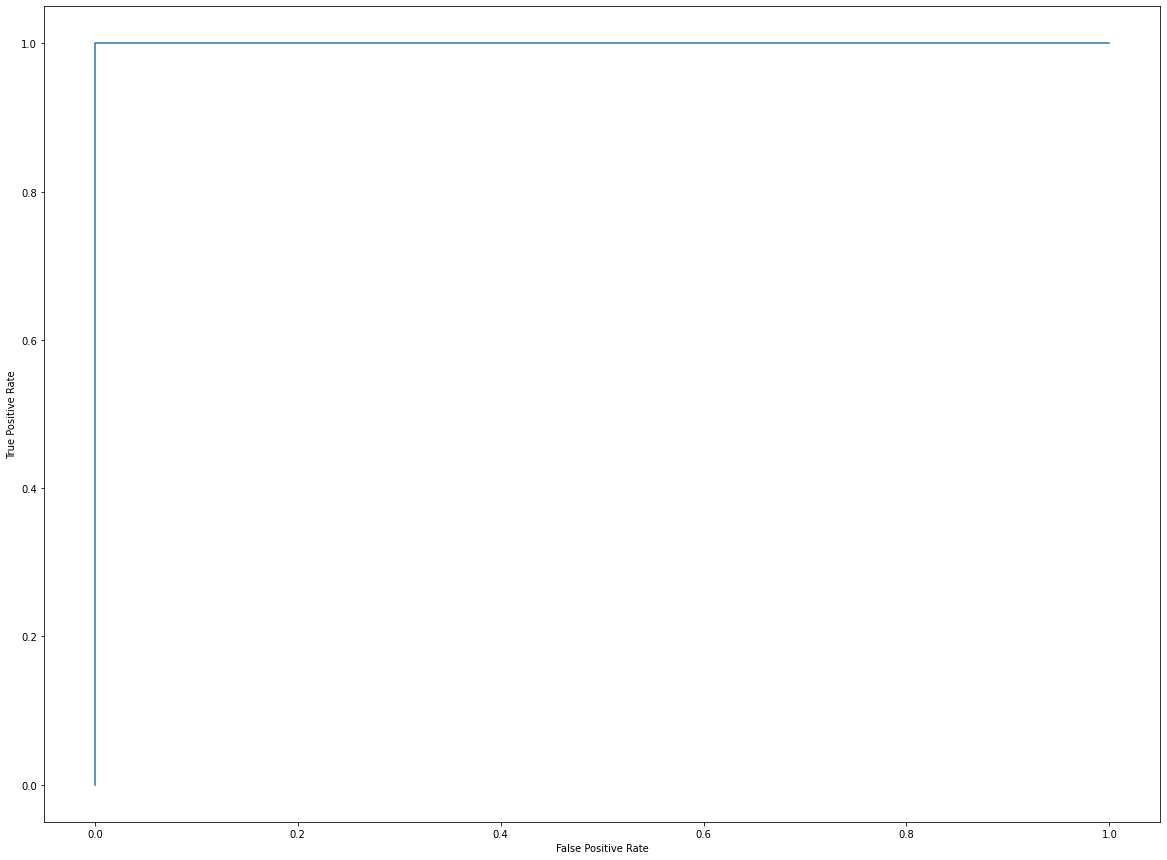

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Lightgmb**

In [ ]:
import lightgbm as lgb

In [ ]:
clf_lgb = lgb.LGBMClassifier()

In [ ]:
params = {
            'num_leaves':[20,40,60,80,100], 
            'min_child_samples':[5,10,15],
            'max_depth':[-1,5,10,20],
            'learning_rate':[0.05,0.1,0.2],
            'reg_alpha':[0,0.01,0.03],
            'min_data_in_leaf': [30, 50, 100, 300, 400],
            'lambda_l1': [0, 1, 1.5],
            'lambda_l2': [0, 1]
         }

In [ ]:
# Grilla para Random Search
model = RandomizedSearchCV(clf_lgb, param_distributions = params, n_iter=100, cv=5)

In [ ]:
model.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=100,
                   param_distributions={'lambda_l1': [0, 1, 1.5],
                                        'lambda_l2': [0, 1],
                                        'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [-1, 5, 10, 20],
                                        'min_child_samples': [5, 10, 15],
                                        'min_data_in_leaf': [30, 50, 100, 300,
                                                             400],
                                        'num_leaves': [20, 40, 60, 80, 100],
                                        'reg_alpha': [0, 0.01, 0.03]})

In [ ]:
model.best_params_

{'reg_alpha': 0.03,
 'num_leaves': 40,
 'min_data_in_leaf': 30,
 'min_child_samples': 15,
 'max_depth': -1,
 'learning_rate': 0.2,
 'lambda_l2': 1,
 'lambda_l1': 0}

In [ ]:
model.best_estimator_

LGBMClassifier(lambda_l1=0, lambda_l2=1, learning_rate=0.2,
               min_child_samples=15, min_data_in_leaf=30, num_leaves=40,
               reg_alpha=0.03)

In [ ]:
y_test_pred_lgb = model.predict(X_test)

In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_test_pred_lgb)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_test_pred_lgb)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_test_pred_lgb)
print('F1 score: %f' % f1)

# Puntaje AUC
auc = roc_auc_score(Y_test, y_test_pred_lgb)
print('AUC score: %f' % auc)

Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000
AUC score: 1.000000


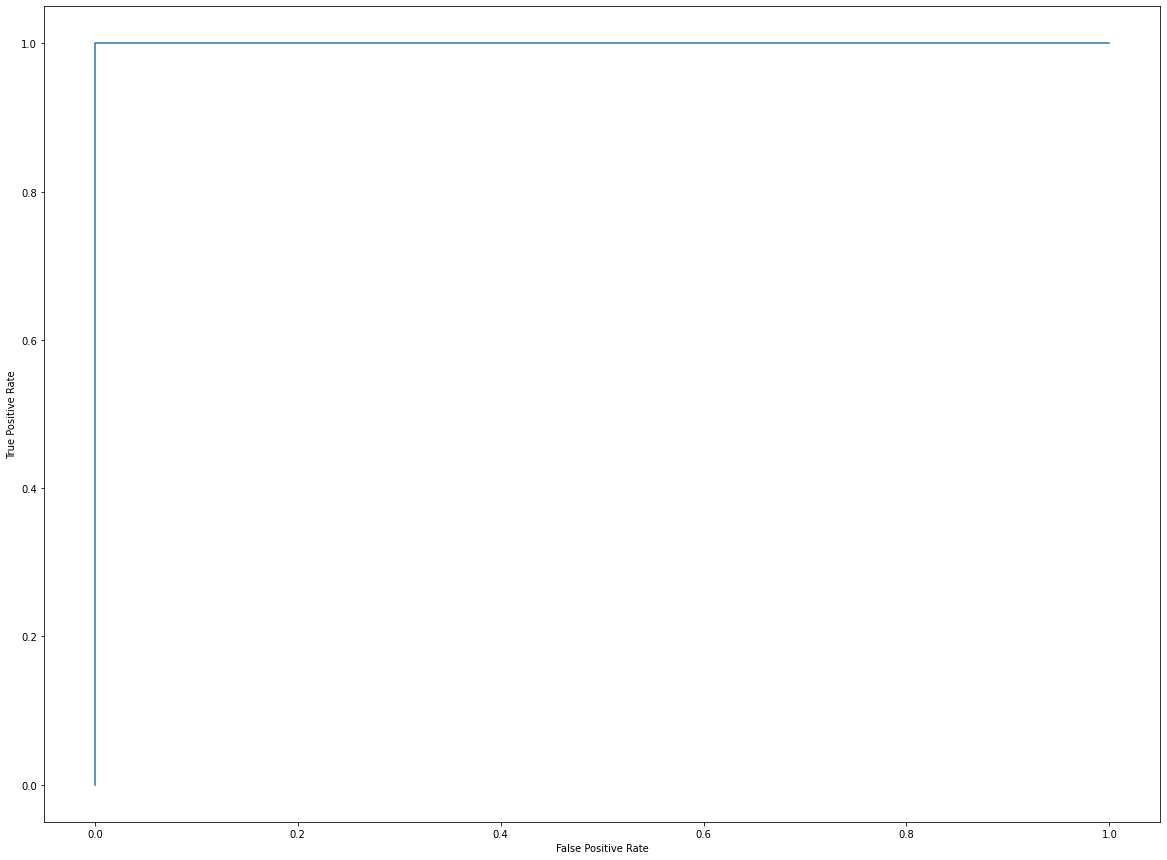

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#**Bagging**

### **BaggingClassifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
model_bag = BaggingClassifier(  base_estimator = DecisionTreeClassifier()  )

In [ ]:
params = {
          
          "base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
          
}

In [ ]:
# Grilla para Grid Search
model = GridSearchCV(model_bag, params, cv=5, verbose=1)

In [ ]:
model.fit(X_train, Y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [3, 5, 10, 20],
                         'base_estimator__max_features': [None, 'auto'],
                         'base_estimator__min_samples_leaf': [1, 3, 5, 7, 10],
                         'base_estimator__min_samples_split': [2, 5, 7],
                         'bootstrap_features': [False, True],
                         'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [2, 5, 10, 20]},
             verbose=1)

In [ ]:
model.best_params_

{'base_estimator__max_depth': 20,
 'base_estimator__max_features': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 5,
 'bootstrap_features': True,
 'max_features': 0.7,
 'max_samples': 1.0,
 'n_estimators': 20}

In [ ]:
model.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                        min_samples_split=5),
                  bootstrap_features=True, max_features=0.7, n_estimators=20)

In [ ]:
y_test_pred_bag = model.predict(X_test)

In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_test_pred_bag)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_test_pred_bag)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_test_pred_bag)
print('F1 score: %f' % f1)

# Puntaje AUC
auc = roc_auc_score(Y_test, y_test_pred_bag)
print('AUC score: %f' % auc)

Precision: 0.986928
Recall: 0.986928
F1 score: 0.986928
AUC score: 0.987012


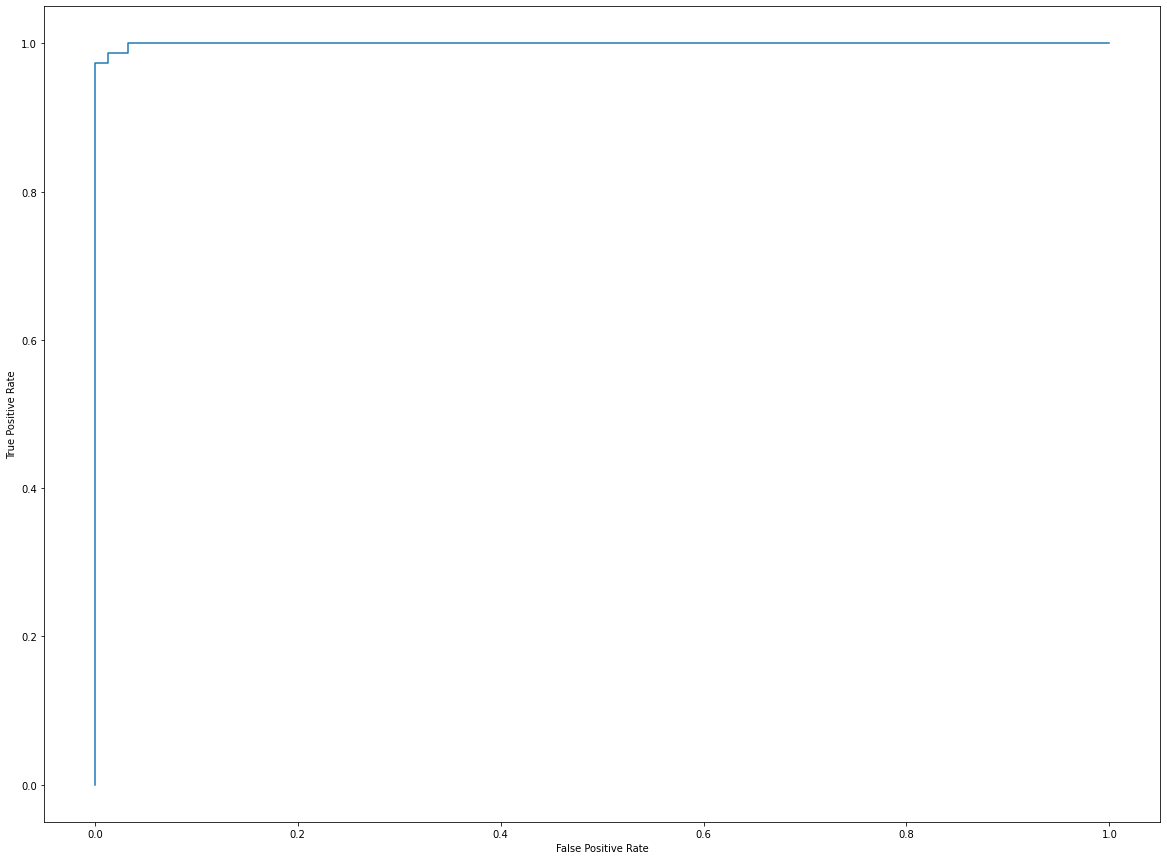

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()